# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 0. Clean Up the Zombie Processes
At the end of this notebook, when you execute `env.close()`, it does not clean up the environment completely. Instead, the Unity environment process becomes a "zombie" process. A zombie process is one that has completed execution but still has an entry in the process table because its parent process hasn’t properly reaped it.
You can yourself verify this by running these commands in the terminal. Find the parent process ID (PPID) of the zombie process:
```bash
ps -o pid,ppid,stat,cmd | grep Reacher
```
If the parent process (PPID) is not 1, kill it to clean up the zombie process:
```bash
kill -9 <PPID>
```
Below is the equivalent Python code that checks for and cleans zombie processes using `psutil`. **You need run the cell below only when you restart the Unity environment.** 

> **NOTE**: The code cell below will also kill the Kernel. You should restart it when required.

In [1]:
import psutil

def cleanup_zombie_processes():
    for proc in psutil.process_iter(['pid', 'ppid', 'name', 'status']):
        if proc.info['name'] == 'Reacher_One_Lin' and proc.info['status'] == 'zombie':
            print(f"Zombie process detected: {proc.info}")
            parent = psutil.Process(proc.info['ppid'])
            print(f"Terminating parent process: {parent}")
            parent.terminate()

cleanup_zombie_processes()

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install .


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

Found path: /data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64
Mono path[0] = '/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis_Data/Managed'
Mono config path = '/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis_Data/MonoBleedingEdge/etc'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	libgrpc_csharp_ext.x86.so
Logging to /home/student/.config/unity3d/Unity Technologies/Unity Environment/Player.log


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [5]:
from DDPG_agent import Agent
import random
from collections import deque

state_dim = env_info.vector_observations.shape[1]
action_dim = brain.vector_action_space_size
print(f"State dimension: {state_dim}, Action dimension: {action_dim}")

agent = Agent(state_size=state_dim, action_size=action_dim, random_seed=4)

def print_model_architecture(model, model_name):
    print(f"\n=== {model_name} Architecture ===")
    print(f"Model: {model.__class__.__name__}")
    
    total_params = 0
    for name, param in model.named_parameters():
        param_count = param.numel()
        total_params += param_count
        print(f"  {name}: {list(param.shape)} -> {param_count:,} parameters")
    
    print(f"Total parameters: {total_params:,}")
    print(f"Model structure:\n{model}")

# Print only the local networks (not targets)
print_model_architecture(agent.actor_local, "ACTOR")
print_model_architecture(agent.critic_local, "CRITIC")

State dimension: 33, Action dimension: 4

=== ACTOR Architecture ===
Model: Actor
  fc1.weight: [600, 33] -> 19,800 parameters
  fc1.bias: [600] -> 600 parameters
  fc2.weight: [400, 600] -> 240,000 parameters
  fc2.bias: [400] -> 400 parameters
  fc3.weight: [200, 400] -> 80,000 parameters
  fc3.bias: [200] -> 200 parameters
  fc4.weight: [4, 200] -> 800 parameters
  fc4.bias: [4] -> 4 parameters
Total parameters: 341,804
Model structure:
Actor(
  (fc1): Linear(in_features=33, out_features=600, bias=True)
  (fc2): Linear(in_features=600, out_features=400, bias=True)
  (fc3): Linear(in_features=400, out_features=200, bias=True)
  (fc4): Linear(in_features=200, out_features=4, bias=True)
)

=== CRITIC Architecture ===
Model: Critic
  fcs1.weight: [400, 33] -> 13,200 parameters
  fcs1.bias: [400] -> 400 parameters
  fc2.weight: [300, 404] -> 121,200 parameters
  fc2.bias: [300] -> 300 parameters
  fc3.weight: [1, 300] -> 300 parameters
  fc3.bias: [1] -> 1 parameters
Total parameters: 13

In [6]:
import time
from tqdm import tqdm
import os
import torch

def ddpg(n_episodes=400, max_t=1000, resume_from_checkpoint=True, start_episode=1):
    scores_deque = deque(maxlen=100) 
    max_score = -np.Inf 
    avg_score = []
    update_step = 5
    
    # Load checkpoints if they exist and resume is enabled
    if resume_from_checkpoint:
        if os.path.exists('checkpoint_actor.pth') and os.path.exists('checkpoint_critic.pth'):
            print("Loading saved checkpoints...")
            
            # Use device-specific loading
            device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
            
            actor_checkpoint = torch.load('checkpoint_actor.pth', map_location=device)
            critic_checkpoint = torch.load('checkpoint_critic.pth', map_location=device)
            
            # Load state dictionaries to both local and target networks
            agent.actor_local.load_state_dict(actor_checkpoint)
            agent.actor_target.load_state_dict(actor_checkpoint)
            agent.critic_local.load_state_dict(critic_checkpoint)
            agent.critic_target.load_state_dict(critic_checkpoint)
            
            print("Checkpoints loaded successfully!")
        else:
            print("No checkpoints found, starting from scratch...")
    
    start_time = time.time()
    
    # Create tqdm progress bar starting from the specified episode
    pbar = tqdm(range(start_episode, n_episodes+1), desc="Training Progress")
    
    for i_episode in pbar:
        episode_start_time = time.time()
        
        env_info = env.reset(train_mode=True)[brain_name]  
        states = env_info.vector_observations                  # get the current state (for each agent) 
        scores = np.zeros(num_agents)
        
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            agent.step(states, actions, rewards, next_states, dones)
            scores += rewards                         # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break
        
        episode_end_time = time.time()
        episode_duration = episode_end_time - episode_start_time
        
        score = np.mean(scores)
        scores_deque.append(score)
        avg_score.append(score)
        
        # Calculate current average (even for early episodes)
        current_avg = np.mean(scores_deque)
        total_elapsed = episode_end_time - start_time
        
        # Update tqdm with current stats every episode
        pbar.set_postfix({
            'Score': f'{score:.2f}',
            'Avg': f'{current_avg:.2f}',
            'Time': f'{episode_duration:.1f}s',
            'Total': f'{total_elapsed/60:.1f}m'
        })
        
        # Keep your original print format every 10 episodes
        if i_episode % 10 == 0:
            print(f'\rEpisode {i_episode}\tAverage Score: {current_avg:.2f}')
        
        # Save checkpoints every 50 episodes as backup
        if i_episode % 50 == 0:
            torch.save(agent.actor_local.state_dict(), f'checkpoint_actor_ep{i_episode}.pth')
            torch.save(agent.critic_local.state_dict(), f'checkpoint_critic_ep{i_episode}.pth')
        
        if current_avg >= 30:
            print(f'\nEnvironment Solved in Episode {i_episode}\tAverage Score: {current_avg:.2f}')
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    
    pbar.close()
    return avg_score

# To resume training, call with the episode number you want to start from
# If you were at episode 150 when it stopped, start from 151
scores = ddpg(resume_from_checkpoint=True, start_episode=1)  # Adjust start_episode as needed


No checkpoints found, starting from scratch...


Training Progress:   2%|▎         | 10/400 [04:58<3:15:30, 30.08s/it, Score=0.61, Avg=0.97, Time=30.2s, Total=5.0m]

Episode 10	Average Score: 0.97


Training Progress:   5%|▌         | 20/400 [10:00<3:10:17, 30.04s/it, Score=1.07, Avg=1.02, Time=29.8s, Total=10.0m]

Episode 20	Average Score: 1.02


Training Progress:   8%|▊         | 30/400 [14:59<3:05:30, 30.08s/it, Score=3.76, Avg=1.55, Time=30.6s, Total=15.0m]

Episode 30	Average Score: 1.55


Training Progress:  10%|█         | 40/400 [20:08<3:05:34, 30.93s/it, Score=7.17, Avg=2.25, Time=31.2s, Total=20.1m]

Episode 40	Average Score: 2.25


Training Progress:  12%|█▎        | 50/400 [25:18<3:01:33, 31.12s/it, Score=5.73, Avg=3.00, Time=31.3s, Total=25.3m] 

Episode 50	Average Score: 3.00


Training Progress:  15%|█▌        | 60/400 [30:30<2:56:25, 31.13s/it, Score=10.65, Avg=4.00, Time=31.6s, Total=30.5m]

Episode 60	Average Score: 4.00


Training Progress:  18%|█▊        | 70/400 [35:41<2:51:22, 31.16s/it, Score=13.26, Avg=4.55, Time=31.0s, Total=35.7m]

Episode 70	Average Score: 4.55


Training Progress:  20%|██        | 80/400 [40:49<2:43:51, 30.72s/it, Score=14.27, Avg=5.80, Time=30.5s, Total=40.8m]

Episode 80	Average Score: 5.80


Training Progress:  22%|██▎       | 90/400 [45:56<2:38:28, 30.67s/it, Score=18.38, Avg=6.78, Time=30.5s, Total=45.9m]

Episode 90	Average Score: 6.78


Training Progress:  25%|██▌       | 100/400 [51:04<2:33:45, 30.75s/it, Score=22.71, Avg=7.92, Time=30.8s, Total=51.1m]

Episode 100	Average Score: 7.92


Training Progress:  28%|██▊       | 110/400 [56:13<2:29:29, 30.93s/it, Score=25.48, Avg=10.05, Time=31.0s, Total=56.2m]

Episode 110	Average Score: 10.05


Training Progress:  30%|███       | 120/400 [1:01:23<2:24:35, 30.98s/it, Score=33.21, Avg=12.81, Time=30.9s, Total=61.4m]

Episode 120	Average Score: 12.81


Training Progress:  32%|███▎      | 130/400 [1:06:33<2:19:13, 30.94s/it, Score=37.64, Avg=16.21, Time=30.9s, Total=66.6m]

Episode 130	Average Score: 16.21


Training Progress:  35%|███▌      | 140/400 [1:11:42<2:13:51, 30.89s/it, Score=39.25, Avg=19.60, Time=30.8s, Total=71.7m]

Episode 140	Average Score: 19.60


Training Progress:  38%|███▊      | 150/400 [1:16:53<2:09:06, 30.99s/it, Score=39.63, Avg=22.89, Time=30.8s, Total=76.9m]

Episode 150	Average Score: 22.89


Training Progress:  40%|████      | 160/400 [1:22:03<2:04:18, 31.08s/it, Score=36.52, Avg=25.75, Time=31.2s, Total=82.1m]

Episode 160	Average Score: 25.75


Training Progress:  42%|████▎     | 170/400 [1:27:14<1:59:27, 31.16s/it, Score=39.40, Avg=28.72, Time=31.2s, Total=87.2m]

Episode 170	Average Score: 28.72


Training Progress:  44%|████▍     | 175/400 [1:30:21<1:56:10, 30.98s/it, Score=39.53, Avg=30.24, Time=31.1s, Total=90.4m]


Environment Solved in Episode 176	Average Score: 30.24


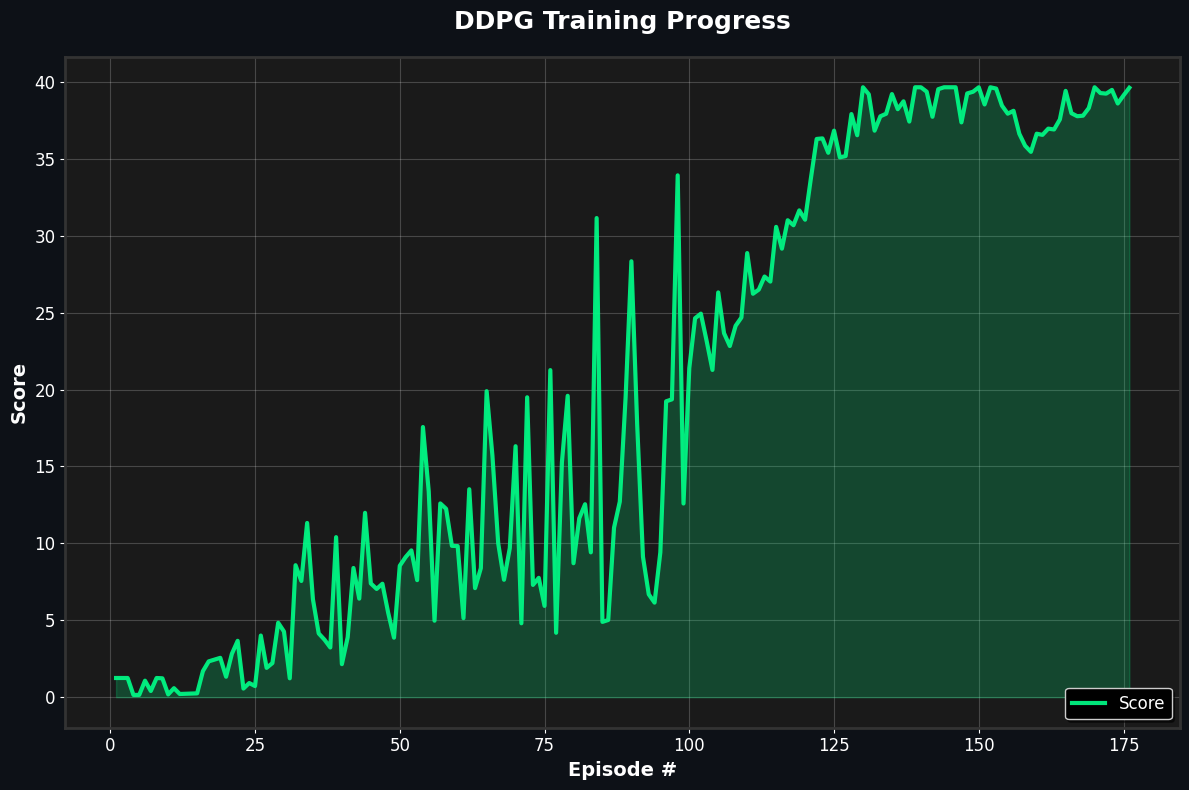

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Set the style
plt.style.use('dark_background')
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# Create the main plot with gradient effect
episodes = np.arange(1, len(scores) + 1)
line = ax.plot(episodes, scores, linewidth=3, color='#00ff88', alpha=0.9, label='Score')[0]

# Add a subtle fill under the curve
ax.fill_between(episodes, scores, alpha=0.2, color='#00ff88')

# Customize the appearance
ax.set_facecolor('#1a1a1a')
fig.patch.set_facecolor('#0d1117')

# Enhanced labels and title
ax.set_ylabel('Score', fontsize=14, fontweight='bold', color='white')
ax.set_xlabel('Episode #', fontsize=14, fontweight='bold', color='white')
ax.set_title('DDPG Training Progress', fontsize=18, fontweight='bold', 
             color='white', pad=20)

# Grid styling
ax.grid(True, linestyle='-', alpha=0.2, color='white')
ax.set_axisbelow(True)

# Customize ticks
ax.tick_params(colors='white', labelsize=12)

# Add some statistics as text
max_score = np.max(scores)
avg_score = np.mean(scores)
final_score = scores[-1]

# Legend
ax.legend(loc='lower right', fontsize=12, fancybox=True, shadow=True)

# Tight layout
plt.tight_layout()

# Add some flair with spine customization
for spine in ax.spines.values():
    spine.set_color('#333333')
    spine.set_linewidth(2)

plt.show()

In [23]:
agent = Agent(state_size=33, action_size=4, random_seed=2)

agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))
env_info = env.reset(train_mode=False)[brain_name]  
states = env_info.vector_observations 
for t in range(500):
    actions = agent.act(states)                        # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done   
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break

In [24]:
env.close()